In [1]:
import h5py
import numpy as np

In [2]:
with h5py.File('chirps-v2_monthly_africa_2.5.nc', 'r') as h5file:
    print(list(h5file.keys()))

['latitude', 'longitude', 'precip', 'time']


In [3]:
with h5py.File('chirps-v2_monthly_africa_2.5.nc', 'r') as h5file:
    latitude = h5file['latitude'][:]
    longitude = h5file['longitude'][:]
    precip = h5file['precip'][:]
    time = h5file['time'][:]

In [4]:
print(f"Shape of precip: {precip.shape}")
print(f"Shape of time: {time.shape}")
print(f"Shape of latitude: {latitude.shape}")
print(f"Shape of longitude: {longitude.shape}")

Shape of precip: (519, 320, 300)
Shape of time: (519,)
Shape of latitude: (320,)
Shape of longitude: (300,)


In [5]:
import xarray as xr

with h5py.File('chirps-v2_monthly_africa_2.5.nc', 'r') as h5file:
    data_vars = {
        'precip': (['time', 'latitude', 'longitude'], h5file['precip'][:]),
    }
    coords = {
        'latitude': h5file['latitude'][:],
        'longitude': h5file['longitude'][:],
        'time': h5file['time'][:],
    }
    
    ds = xr.Dataset(data_vars=data_vars, coords=coords)
    print(ds)

<xarray.Dataset> Size: 199MB
Dimensions:    (time: 519, latitude: 320, longitude: 300)
Coordinates:
  * latitude   (latitude) float32 1kB -39.87 -39.62 -39.37 ... 39.38 39.62 39.87
  * longitude  (longitude) float32 1kB -19.88 -19.63 -19.38 ... 54.62 54.88
  * time       (time) int64 4kB 0 31 59 90 120 ... 15644 15674 15705 15736 15765
Data variables:
    precip     (time, latitude, longitude) float32 199MB -9.999e+03 ... 11.81


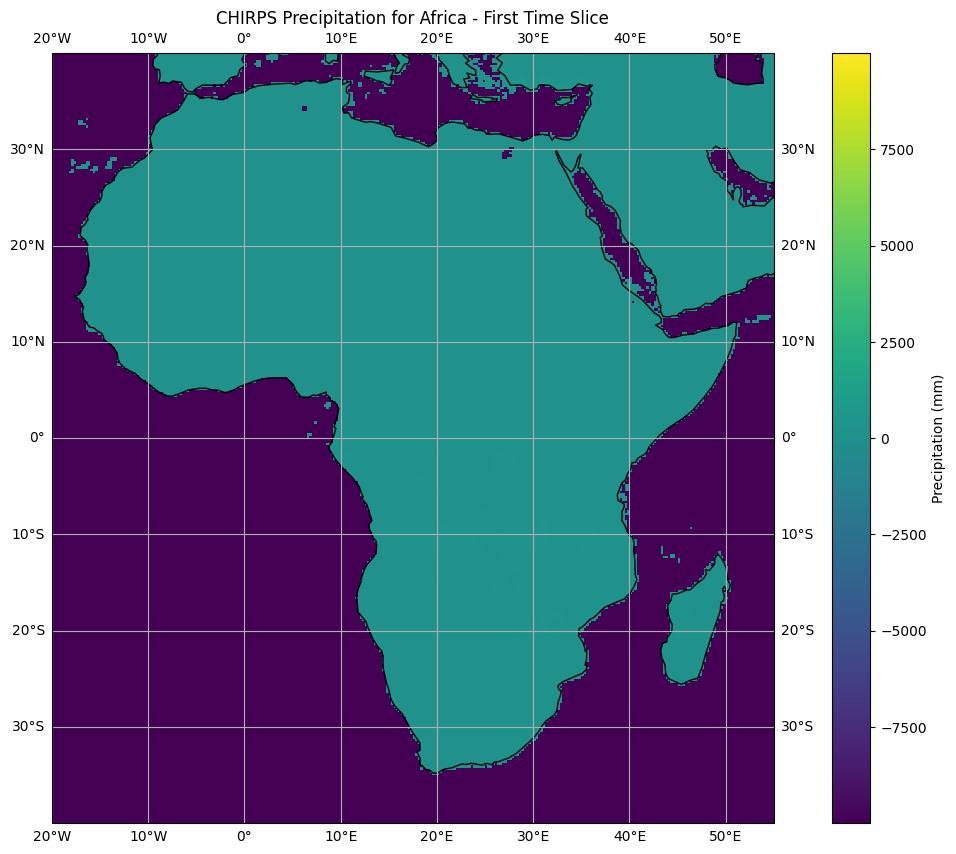

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

precip_slice = ds['precip'].isel(time=0)

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

precip_slice.plot(ax=ax, transform=ccrs.PlateCarree(), 
                  cmap='viridis', cbar_kwargs={'label': 'Precipitation (mm)'})

ax.coastlines()
ax.gridlines(draw_labels=True)

plt.title('CHIRPS Precipitation for Africa - First Time Slice')

plt.show()